In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Metadata of movielens

The movielens dataset contains several pieces of information about movies taken from http://movielens.org, a movie recommendation service. The dataset contains 4 separate csv files:

1. links.csv: which contains the ID of a given movie on imdb and themoviedb
2. tags.csv: which contains user given tags for a specific movie
3. movies.csv: which contains the name of a movie ID along with the genres that the movie belongs to
4. ratings.csv: which contains the ratings given by users to a specific movie

### Objective of the Project:

### The movielens project is aimed at creating recommendation system using the datasets containing in the folder for training of the algorithms, movie ratings prediction and suggesting good and quality films for movie lovers.

### Libraries used:

1. Pandas for reading the file, dataframe creation, data manipulation, preprocessing, exploratory analysis
2. Numpy for carrying out mathematical operations
3. Matplotlib and Seaborn for data visualization through graphs, plots etc.

### Ratings dataset

In [117]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Movies dataset

In [118]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Merging Ratings and Movies dataset into one

In [119]:
ratings = ratings.merge(movies,on='movieId',how='left')
ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### Finding out the non-null value count and the datatype of each column

In [120]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [121]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [122]:
neg_values = ratings['movieId'].values<0
neg_values = pd.DataFrame(neg_values)
neg_values.count()

0    100836
dtype: int64

### As there are no null values and negative values, we can proceed to exploratory analysis

In [123]:
ratings.drop(columns=['timestamp'],inplace=True)

### Creating a new column which specifies the year in the movie released

In [124]:
ratings['Year'] = ratings['title'].str.extract('.*\((.*)\).*',expand = False)

In [125]:
ratings

,userId,movieId,rating,title,genres,Year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller,2017
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017
100833,610,168250,5.0,Get Out (2017),Horror,2017
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi,2017


### Counting the number of films released in each year

In [126]:
count_per_year = ratings['Year'].value_counts()
count_per_year = pd.DataFrame(count_per_year)
count_per_year

,Year
1995,6144
1994,5296
1999,4536
1996,4509
2000,4268
...,...
1917,1
2006–2007,1
1908,1
1915,1


### Bar plot showing the number of films released in the first 10 years present in the above dataframe

<BarContainer object of 10 artists>

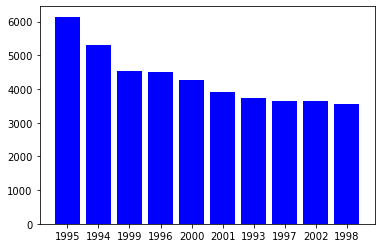

In [127]:
plt.bar(count_per_year.head(10).index,count_per_year.head(10).Year,color='b')

### Statistics of each numeric column in the dataframe

In [128]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


### Plotting the number of films released in each genre

<BarContainer object of 19 artists>

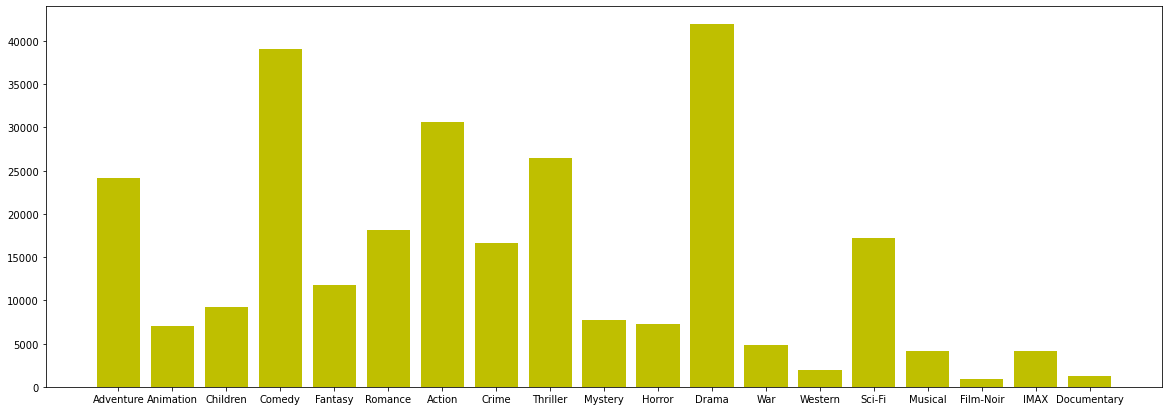

In [129]:
plt.figure(figsize=(20,7))
genre_list = ratings['genres'].apply(lambda i : str(i).split("|"))
count={}
for i in genre_list:
    for j in i:
        if(count.get(j,False)):
            count[j]=count[j]+1
        else:
            count[j] = 1      
count.pop("(no genres listed)")
plt.bar(count.keys(),count.values(),color='y')

### Frequency distribution of ratings

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

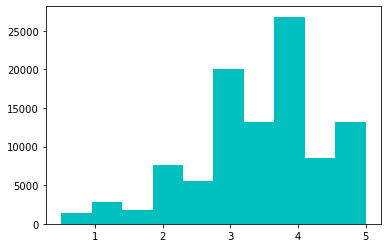

In [130]:
plt.hist(ratings.rating, color='c')

### Finding out the number of reviews given by each user and the mean rating given by each

In [131]:
rating_stat = ratings.groupby('userId').agg([np.size,np.mean])
rating_stat

movieId                rating          
          size          mean    size      mean
userId                                        
1          232   1854.603448   232.0  4.366379
2           29  70350.275862    29.0  3.948276
3           39   7058.384615    39.0  2.435897
4          216   1982.129630   216.0  3.555556
5           44    343.840909    44.0  3.636364
...        ...           ...     ...       ...
606       1115   9692.197309  1115.0  3.657399
607        187   1860.636364   187.0  3.786096
608        831   4502.605295   831.0  3.134176
609         37    483.162162    37.0  3.270270
610       1302  49590.231183  1302.0  3.688556

[610 rows x 4 columns]

### Bar plot which showcases the number of reviews given by the top 10 users

<AxesSubplot:xlabel='userId'>

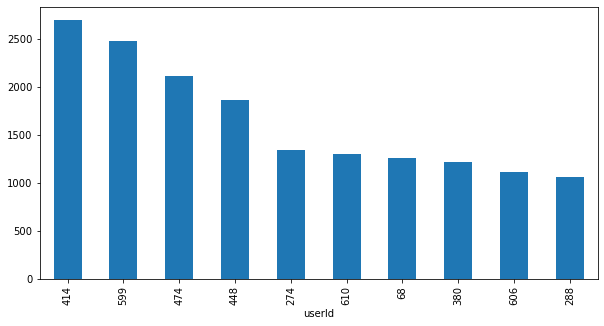

In [132]:
rating_stat['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

### Average Rating received by the movie

In [133]:
Average_rating = ratings.groupby('title')['rating'].mean()
Average_rating = pd.DataFrame(Average_rating)
Average_rating.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


(array([ 108.,  185.,  309.,  694.,  961., 1840., 2208., 2274.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

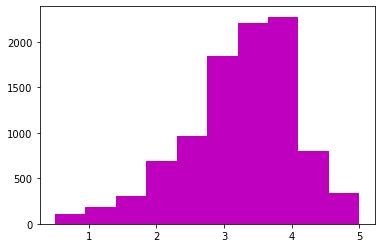

In [134]:
plt.hist(Average_rating.rating, color='m')

### Number of reviews received by the movie

In [135]:
Average_rating['No_of_Reviews'] = ratings.groupby('title')['rating'].count()
Average_rating.head(10)

,rating,No_of_Reviews
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


(array([8.941e+03, 4.990e+02, 1.410e+02, 7.200e+01, 2.800e+01, 1.800e+01,
        1.200e+01, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([  1. ,  33.8,  66.6,  99.4, 132.2, 165. , 197.8, 230.6, 263.4,
        296.2, 329. ]),
 <BarContainer object of 10 artists>)

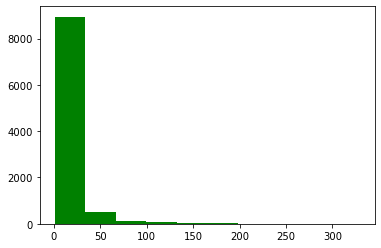

In [136]:
plt.hist(Average_rating.No_of_Reviews, color='g')

### Finding out the number of reviews and the average rating received by each film

In [137]:
rating_by_movie = ratings.groupby('movieId').agg([np.size,np.mean])
rating_by_movie = rating_by_movie.drop('userId',axis=1)
rating_by_movie

rating          
          size      mean
movieId                 
1        215.0  3.920930
2        110.0  3.431818
3         52.0  3.259615
4          7.0  2.357143
5         49.0  3.071429
...        ...       ...
193581     1.0  4.000000
193583     1.0  3.500000
193585     1.0  3.500000
193587     1.0  3.500000
193609     1.0  4.000000

[9724 rows x 2 columns]

### Listing out the movieIds with low ratings

In [138]:
low_ratings = rating_by_movie['rating']['mean']<2
low_ratings

movieId
1         False
2         False
3         False
4         False
5         False
          ...  
193581    False
193583    False
193585    False
193587    False
193609    False
Name: mean, Length: 9724, dtype: bool

In [139]:
low_rating_data = rating_by_movie[low_ratings]
low_rating_data

rating     
          size mean
movieId            
71         5.0  1.7
152        2.0  1.5
178        1.0  1.0
179        2.0  1.5
278        2.0  1.5
...        ...  ...
190207     1.0  1.5
190213     1.0  1.0
190215     1.0  1.5
190219     1.0  1.0
190221     1.0  1.0

[636 rows x 2 columns]

### Plotting the mean rating of first 20 films

<AxesSubplot:xlabel='movieId'>

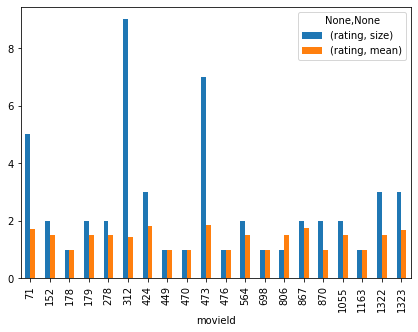

In [140]:
low_rating_data.head(20).plot(kind='bar', figsize=(7,5))

### Plotting the best mean rating by that particular movieId

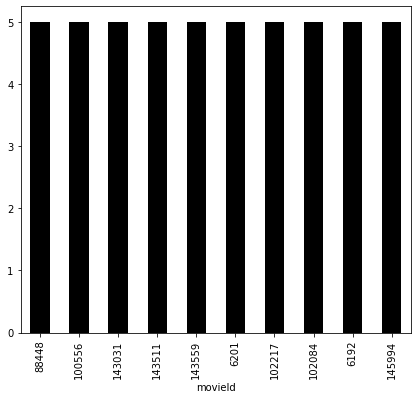

In [141]:
rating_by_movie['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(7,6), color='k');

### MovieId vs UserId

In [142]:
movie_user = ratings.pivot_table(index='movieId',columns='userId',values='rating')
movie_user = movie_user.fillna(0)
movie_user

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Importing the KNN library from sklearn

In [143]:
from sklearn.neighbors import NearestNeighbors

In [144]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(movie_user.values)
distances, indices = knn.kneighbors(movie_user.values, n_neighbors=3)

In [145]:
indices

array([[   0, 2353,  418],
       [   1,  322,  436],
       [   2, 2578,  607],
       ...,
       [8173, 8729, 9155],
       [8173, 8729, 9155],
       [9723, 9665, 9603]], dtype=int64)

### Distances between each pair

In [146]:
distances

array([[3.33066907e-16, 4.27398740e-01, 4.34363196e-01],
       [0.00000000e+00, 4.11562274e-01, 4.50181894e-01],
       [1.11022302e-16, 5.52013240e-01, 5.53215549e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.14034609e-01, 7.07491030e-01]])

In [152]:
ratings = pd.read_csv('ratings.csv', usecols=['userId','movieId','rating'])
movies = pd.read_csv('movies.csv', usecols=['movieId','title'])
ratings2 = pd.merge(ratings, movies, how='inner', on='movieId')

### Pivot table containing title and userId with ratings as value

In [153]:
df = ratings2.pivot_table(index='title',columns='userId',values='rating').fillna(0)
df1 = df.copy()
df1

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


### Recommender System

In [165]:
def recommend_movies(user, num_recommended_movies):

    print('The list of the Movies {} Has Watched \n'.format(user))

    for m in df[df[user] > 0][user].index.tolist():
        print(m)
  
    print('\n')

    recommended_movies = []

    for m in df[df[user] == 0].index.tolist():

        index_df = df.index.tolist().index(m)
        predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
        recommended_movies.append((m, predicted_rating))

    sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
  
    print('The list of the Recommended Movies \n')
    rank = 1
    for recommended_movie in sorted_rm[:num_recommended_movies]:
    
        print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
        rank = rank + 1

In [166]:
def movie_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_movies = indices[m].tolist()
      movie_distances = distances[m].tolist()
    
      if m in sim_movies:
        id_movie = sim_movies.index(m)
        sim_movies.remove(m)
        movie_distances.pop(id_movie) 

      else:
        sim_movies = sim_movies[:num_neighbors-1]
        movie_distances = movie_distances[:num_neighbors-1]
           
      movie_similarity = [1-x for x in movie_distances]
      movie_similarity_copy = movie_similarity.copy()
      nominator = 0

      for s in range(0, len(movie_similarity)):
        if df.iloc[sim_movies[s], user_index] == 0:
          if len(movie_similarity_copy) == (number_neighbors - 1):
            movie_similarity_copy.pop(s)
          
          else:
            movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
            
        else:
          nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
          
      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_r = nominator/sum(movie_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_movies(user,num_recommendation)

### Evaluation of the system

In [167]:
movie_recommender(15, 10, 10)

The list of the Movies 15 Has Watched 

(500) Days of Summer (2009)
10 Cloverfield Lane (2016)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
28 Days Later (2002)
9 (2009)
A.I. Artificial Intelligence (2001)
Adjustment Bureau, The (2011)
Aladdin (1992)
Alien (1979)
Aliens (1986)
American Beauty (1999)
American History X (1998)
American Psycho (2000)
Apocalypto (2006)
Avatar (2009)
Avengers, The (2012)
Back to the Future (1985)
Back to the Future Part II (1989)
Back to the Future Part III (1990)
Beautiful Mind, A (2001)
Bicentennial Man (1999)
Bolt (2008)
Bridge of Spies (2015)
Captain America: The Winter Soldier (2014)
Captain Phillips (2013)
Casper (1995)
Cast Away (2000)
Catch Me If You Can (2002)
Chappie (2015)
Children of Men (2006)
Cloudy with a Chance of Meatballs (2009)
Dark Knight Rises, The (2012)
Dark Knight, The (2008)
Deadpool (2016)
District 9 (2009)
Django Unchained (2012)
Doctor Strange (2016)
Edge of Tomorrow (2014)
Escape from L.A. (1996)
Ex Machina (2015)
Fift

### So, for the given input for the user, we got the top 10 recommendations.